In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import shap
import warnings
warnings.filterwarnings("ignore")

# Merging clusters with the vital signs

In [2]:
clusters = pd.read_csv('/kaggle/input/prediction-grad/Final.csv')
vital_signs = pd.read_csv('/kaggle/input/prediction-grad/copy merged.csv')

In [3]:
clusters.head()

,FileName,Cluster ID
0,0X6C96589B41EBA3C5.avi,2
1,0X7630DA7B2D3E6F27.avi,0
2,0X35FEF9072E3537BB.avi,2
3,0XCEEA1EA058DA6C0.avi,2
4,0X10B7505562B0A702.avi,2


In [4]:
clusters['FileName'] = clusters['FileName'].str.rstrip('.avi')

In [5]:
vital_signs.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Lymph,Neut,PLT,Region RWMA,VHD,Cath,FileName,EF,ESV,EDV
0,53,90,175,Male,29.387755,0,1,1,0,0,...,39,52,261,0,N,Cad,0X102C51641C321436,50.836241,30.907196,62.865812
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,38,55,165,4,N,Cad,0X11751D404DAD3313,40.763986,187.831612,317.090229
2,54,54,164,Male,20.077335,0,0,1,0,0,...,38,60,230,2,mild,Cad,0X11C89001BEF939E2,40.431085,74.086258,124.370670
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,18,72,742,0,Severe,Normal,0X10075961BC11C88E,54.545097,33.143084,72.914210
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,55,39,274,0,Severe,Normal,0X102CFB07F752AAE6,50.794718,33.947173,68.990913


In [6]:
merged_df = pd.merge(vital_signs, clusters[['FileName', 'Cluster ID']], 
                    on='FileName', how='left')

# Save the result to a new Excel file
merged_df.to_csv('merged_output.csv', index=False)

# Making prediction based on the vital signs

In [7]:
df = pd.read_csv('/kaggle/working/merged_output.csv')

In [8]:
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Neut,PLT,Region RWMA,VHD,Cath,FileName,EF,ESV,EDV,Cluster ID
0,53,90,175,Male,29.387755,0,1,1,0,0,...,52,261,0,N,Cad,0X102C51641C321436,50.836241,30.907196,62.865812,2
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,55,165,4,N,Cad,0X11751D404DAD3313,40.763986,187.831612,317.090229,2
2,54,54,164,Male,20.077335,0,0,1,0,0,...,60,230,2,mild,Cad,0X11C89001BEF939E2,40.431085,74.086258,124.370670,2
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,72,742,0,Severe,Normal,0X10075961BC11C88E,54.545097,33.143084,72.914210,2
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,39,274,0,Severe,Normal,0X102CFB07F752AAE6,50.794718,33.947173,68.990913,2


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,58.897690,10.392278,30.000000,51.000000,58.000000,66.000000,86.000000
Weight,303.0,73.831683,11.987358,48.000000,65.000000,74.000000,81.000000,120.000000
Length,303.0,164.716172,9.327661,140.000000,158.000000,165.000000,171.000000,188.000000
BMI,303.0,27.248339,4.098865,18.115413,24.514380,26.775510,29.411765,40.900658
DM,303.0,0.297030,0.457706,0.000000,0.000000,0.000000,1.000000,1.000000
HTN,303.0,0.590759,0.492507,0.000000,0.000000,1.000000,1.000000,1.000000
Current Smoker,303.0,0.207921,0.406491,0.000000,0.000000,0.000000,0.000000,1.000000
EX-Smoker,303.0,0.033003,0.178941,0.000000,0.000000,0.000000,0.000000,1.000000
FH,303.0,0.158416,0.365734,0.000000,0.000000,0.000000,0.000000,1.000000
BP,303.0,129.554455,18.938105,90.000000,120.000000,130.000000,140.000000,190.000000


In [10]:
# Drop unnecessary columns
df = df.drop(['FileName'], axis=1)

# Separate features and target
X = df.drop('Cluster ID', axis=1)
y = df['Cluster ID']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Initialize models
models = {
    "XGBoost": XGBClassifier(objective='multi:softmax', num_class=4, 
                            use_label_encoder=False, eval_metric='mlogloss',
                            random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(multi_class='multinomial', 
                                            solver='lbfgs', max_iter=1000,
                                            random_state=42),
    "LightGBM": LGBMClassifier(objective='multiclass', random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    # Fit model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    
    # Store results
    results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred),
        'model': model
    }

# Compare results
for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"CV Mean Accuracy: {result['cv_mean']:.4f} (±{result['cv_std']:.4f})")
    print(f"Test Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result['report'])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 193, number of used features: 41
[LightGBM] [Info] Start training from score -2.429477
[LightGBM] [Info] Start training from score -2.318251
[LightGBM] [Info] Start training from score -0.306863
[LightGBM] [Info] Start training from score -2.554640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [12]:
# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize and fit
xgb = XGBClassifier(objective='multi:softmax', num_class=3, 
                   use_label_encoder=False, eval_metric='mlogloss',
                   random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                          cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best CV Accuracy: 0.7396258503401361
Test Accuracy: 0.7377049180327869
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         5
           2       0.75      1.00      0.86        45
           3       0.00      0.00      0.00         5

    accuracy                           0.74        61
   macro avg       0.19      0.25      0.21        61
weighted avg       0.55      0.74      0.63        61



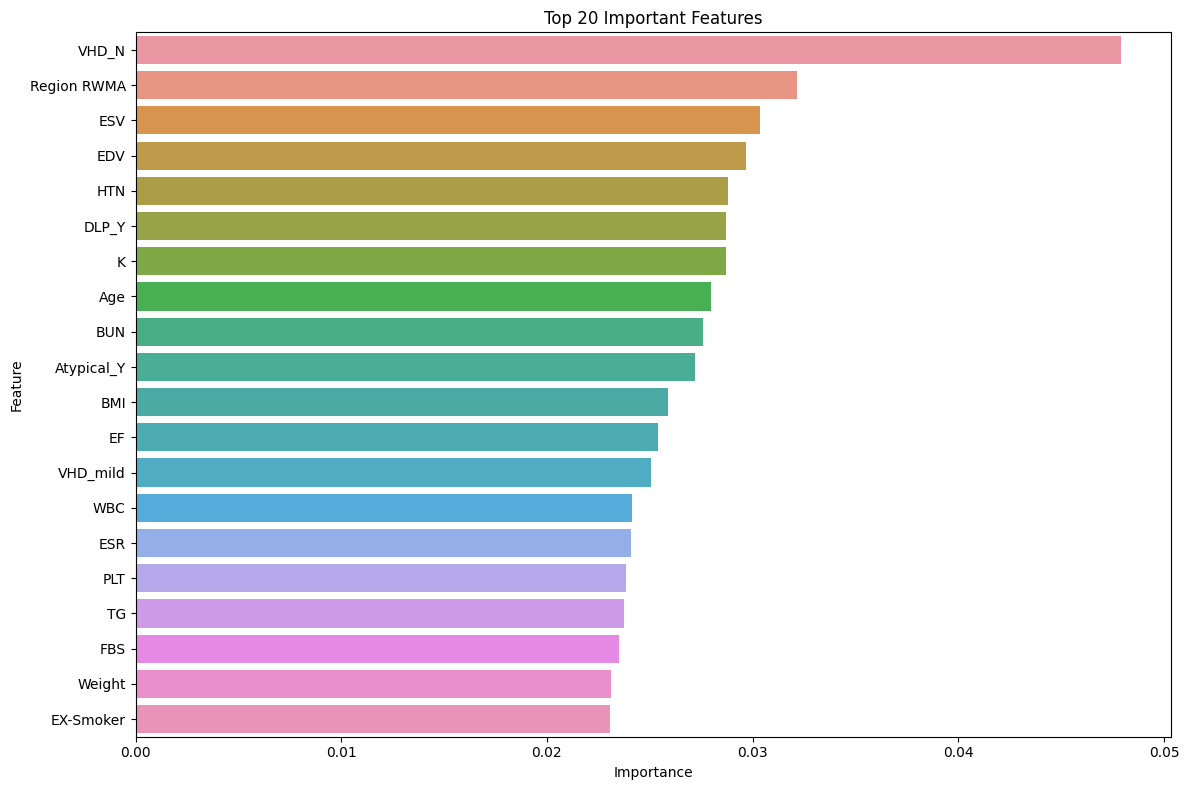

In [13]:
# Get feature importance from best XGBoost model
feature_importance = best_xgb.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Important Features')
plt.tight_layout()
plt.show()

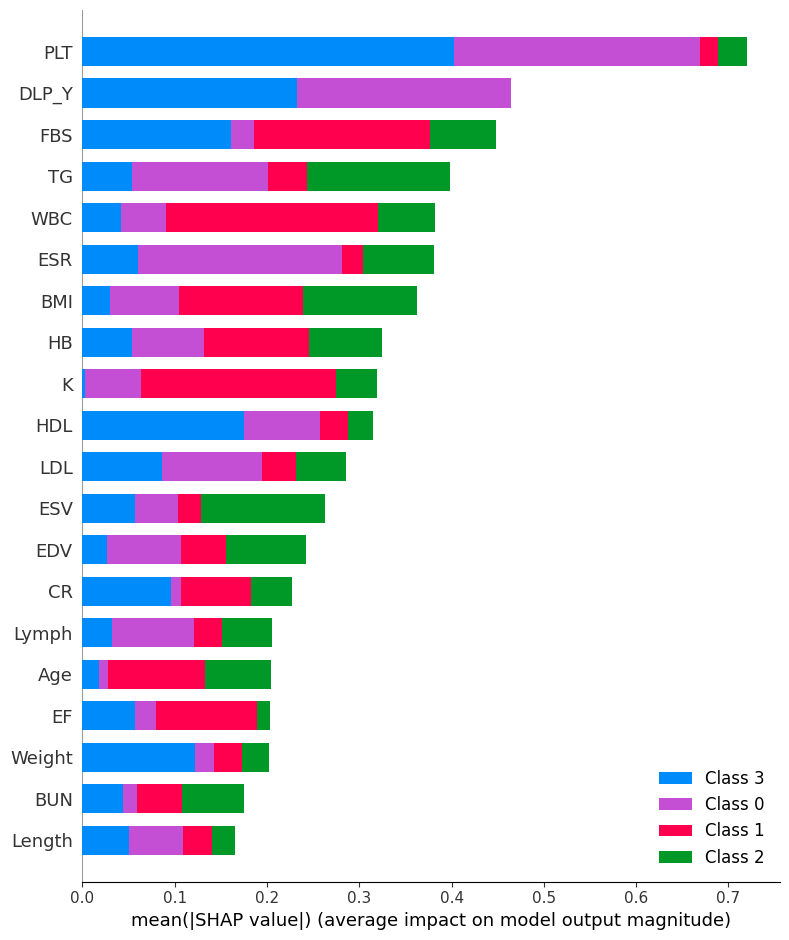

In [14]:
# Explain model predictions using SHAP
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=features, plot_type="bar")

In [15]:
import joblib

# Assuming you've already trained your best model (from previous steps)
best_model = grid_search.best_estimator_

# Save the entire pipeline (including preprocessing)
joblib.dump(best_model, 'cardiac_model.pkl')

['cardiac_model.pkl']